In [1]:
import MDAnalysis
from MDAnalysis.analysis.lineardensity import LinearDensity
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
u = MDAnalysis.Universe("step5_input.psf","wrap.dcd")

In [3]:
sele_lipid = u.select_atoms("resname POPC POPS")
sele_dcle = u.select_atoms("resname DCLE")
sele_water = u.select_atoms("name OH2")
sele_protein = u.select_atoms("protein")

In [4]:
ldens = LinearDensity(sele_lipid,grouping='atoms',binsize=4)
ldens.run()
ldens2 = LinearDensity(sele_dcle,grouping='atoms',binsize=4)
ldens2.run()
ldens3 = LinearDensity(sele_water,grouping='atoms',binsize=4)
ldens3.run()
ldens4 = LinearDensity(sele_protein,grouping='atoms',binsize=4)
ldens4.run()
ldens.nbins
#print(ldens.results.z.pos)

50

(8.0, 18.0)

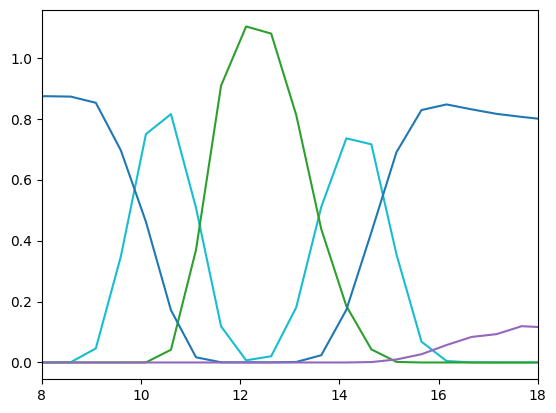

In [5]:
fig,ax = plt.subplots()
x=np.linspace(0, 50, 100)
plt.plot(x, np.concatenate([ldens.results['z']['pos'],ldens.results['z']['pos']]),c='tab:cyan')
plt.plot(x, np.concatenate([ldens2.results['z']['pos'],ldens2.results['z']['pos']]),c='tab:green')
plt.plot(x, np.concatenate([ldens3.results['z']['pos'],ldens3.results['z']['pos']]),c='tab:blue')
plt.plot(x, np.concatenate([ldens4.results['z']['pos'],ldens4.results['z']['pos']]),c='tab:purple')
plt.xlim([8,18])

In [6]:
# SYMMETRIC

u = MDAnalysis.Universe("step5_input.psf","step7_1.dcd")


In [7]:
sele_lipid = u.select_atoms("resname POPC POPS")
sele_dcle = u.select_atoms("resname DCLE")
sele_water = u.select_atoms("name OH2")
ldens = LinearDensity(sele_lipid,grouping='atoms',binsize=1.8)
ldens.run()
ldens2 = LinearDensity(sele_dcle,grouping='atoms',binsize=1.8)
ldens2.run()
ldens3 = LinearDensity(sele_water,grouping='atoms',binsize=1.8)
ldens3.run()
ldens.nbins


113

In [8]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)

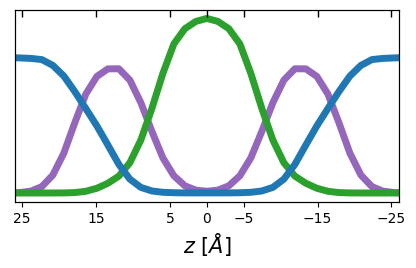

In [17]:
fig,ax = plt.subplots()
x=np.linspace(-25,25, ldens.nbins)*(29.8/8.92857143)
adjustFigAspect(fig,aspect=2)
plt.plot(x, np.add(ldens.results['z']['pos'],ldens.results['z']['pos'][::-1])/2,c='tab:purple',linewidth=5)
plt.plot(x, np.add(ldens2.results['z']['pos'],ldens2.results['z']['pos'][::-1])/2,c='tab:green',linewidth=5)
plt.plot(x, np.add(ldens3.results['z']['pos'],ldens3.results['z']['pos'][::-1])/2,c='tab:blue',linewidth=5)
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlim([-26,26])
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel('$z$ [$\AA$]',size=15)
ax.set_xticks([25,15,5,0,-5,-15,-25],size=15)
ax.set_xlabel('$z$ [$\AA$]',size=15)
#ax.set_xticks([])
ax.set_yticks([])


# Add xticks on the top of the figure
ax2 = ax.twiny()  # Create a twin Axes sharing the y-axis
ax2.set_xlim(ax.get_xlim())  # Set the same x-axis limits as the original Axes

# Choose the top x-axis tick positions you want
top_xticks = [-25, -15, -5, 0, 5, 15, 25]
ax2.set_xticks(top_xticks)

# Hide the tick labels and xlabel for the top x-axis
ax2.set_xticklabels([])
ax2.set_xlabel('')  # Set an empty label for the top x-axis

# Show xtick lines only on the top of the figure
ax2.tick_params(axis='x', which='both', direction='in', length=5, width=1, color='black')

# Hide the tick lines and labels on the bottom x-axis
#ax.tick_params(axis='x', which='both', length=0)

fig.savefig("/Users/jespermadsen/Projects/FV-HMMM/figures/fig1_layout_fva_domains/hist.pdf")